In [1]:
# change directory to the root of the project (assuming that the notebook is in the draft folder)
import os
os.chdir("..")
print("Current working directory: %s" % os.getcwd())

Current working directory: c:\Users\bcynuaa\Desktop\LocalProject\Help\CFDPostFlutterHelp\CODE\CLShakeAoA


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.classes.AoAFinder import AoAFinder
mesh_filename: str = "C://Project//Mesh//001_t010.x"
Minf: float = 0.72
dt: float = -0.2
aoa_finder: AoAFinder = AoAFinder(mesh_filename, Minf)

config: CalculationSettings.py is imported.
config: InpFileSettings.py is imported.
config: AoAFinderSettings.py is imported.
config: Cfl3d.py is imported.
config: Meshes.py is imported.
utils: Path is imported.
utils: RunExe is imported.
classes: CalculationTask imported
classes: AoAFinder.py is imported.


In [3]:
aoa_finder.findConvergeAoA()

Task folder created: C:\Project\Data\001_t010\M_0.720\A_1.500
Inp file overwritten: C:\Project\CFL3D\cfl3d.inp
Running calculation task for 
mesh: C://Project//Mesh//001_t010.x, Minf: 0.720000, AoA: 1.500000, dt: -0.200000
Files copied from exe path to task folder: C:\Project\Data\001_t010\M_0.720\A_1.500
Calculation task finished
Results readed
Task folder created: C:\Project\Data\001_t010\M_0.720\A_4.000
Inp file overwritten: C:\Project\CFL3D\cfl3d.inp
Running calculation task for 
mesh: C://Project//Mesh//001_t010.x, Minf: 0.720000, AoA: 4.000000, dt: -0.200000
Files copied from exe path to task folder: C:\Project\Data\001_t010\M_0.720\A_4.000
Calculation task finished
Results readed
Task folder created: C:\Project\Data\001_t010\M_0.720\A_2.750
Inp file overwritten: C:\Project\CFL3D\cfl3d.inp
Running calculation task for 
mesh: C://Project//Mesh//001_t010.x, Minf: 0.720000, AoA: 2.750000, dt: -0.200000
Files copied from exe path to task folder: C:\Project\Data\001_t010\M_0.720\A_2.7

In [4]:
aoa_finder.refineAoA()

Task folder created: C:\Project\Data\001_t010\M_0.720\A_0.500
Inp file overwritten: C:\Project\CFL3D\cfl3d.inp
Running calculation task for 
mesh: C://Project//Mesh//001_t010.x, Minf: 0.720000, AoA: 0.500000, dt: -0.200000
Files copied from exe path to task folder: C:\Project\Data\001_t010\M_0.720\A_0.500
Calculation task finished
Results readed
Task folder created: C:\Project\Data\001_t010\M_0.720\A_0.879
Inp file overwritten: C:\Project\CFL3D\cfl3d.inp
Running calculation task for 
mesh: C://Project//Mesh//001_t010.x, Minf: 0.720000, AoA: 0.878516, dt: -0.200000
Files copied from exe path to task folder: C:\Project\Data\001_t010\M_0.720\A_0.879
Calculation task finished
Results readed
Task folder created: C:\Project\Data\001_t010\M_0.720\A_1.636
Inp file overwritten: C:\Project\CFL3D\cfl3d.inp
Running calculation task for 
mesh: C://Project//Mesh//001_t010.x, Minf: 0.720000, AoA: 1.635547, dt: -0.200000
Files copied from exe path to task folder: C:\Project\Data\001_t010\M_0.720\A_1.6

In [5]:
dataframe = aoa_finder.dataframe.copy()
df = dataframe[["AoA", "CL", "dudy min", "converge"]]
df

,AoA,CL,dudy min,converge
0,0.500000,0.677888,65951.95828167339,True
1,0.878516,0.752952,62293.420454429666,True
2,1.500000,0.884594,86948.05889688394,True
3,1.635547,0.915707,88126.66741206308,True
4,2.014062,1.005465,80840.55579157965,True
5,2.203320,1.053274,77803.85823310337,True
6,2.392578,1.101683,75774.0944395984,True
7,2.750000,1.193891,71710.73661866268,True
8,2.771094,1.198668,72787.85267081994,True
9,2.834180,1.209657,74912.04440335222,True


In [6]:
df_converge = df[df["converge"] == "True"]

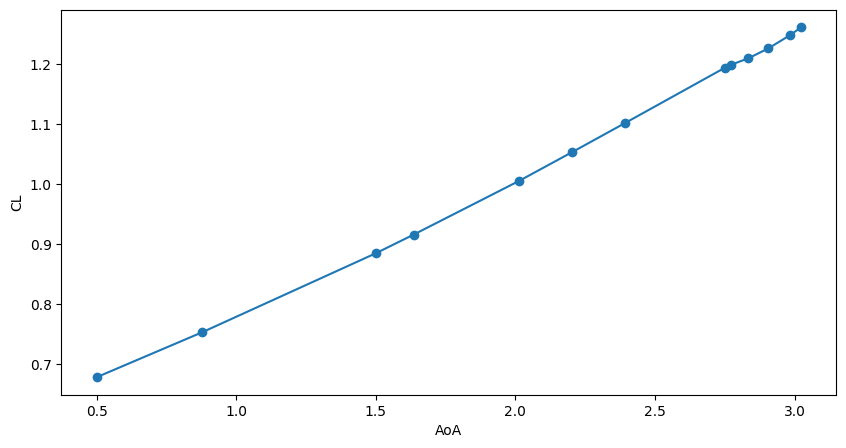

In [7]:
# CL-AoA
plt.figure(figsize=(10, 5))
plt.plot(df_converge["AoA"], df_converge["CL"], "-o")
plt.xlabel("AoA")
plt.ylabel("CL")
plt.show()

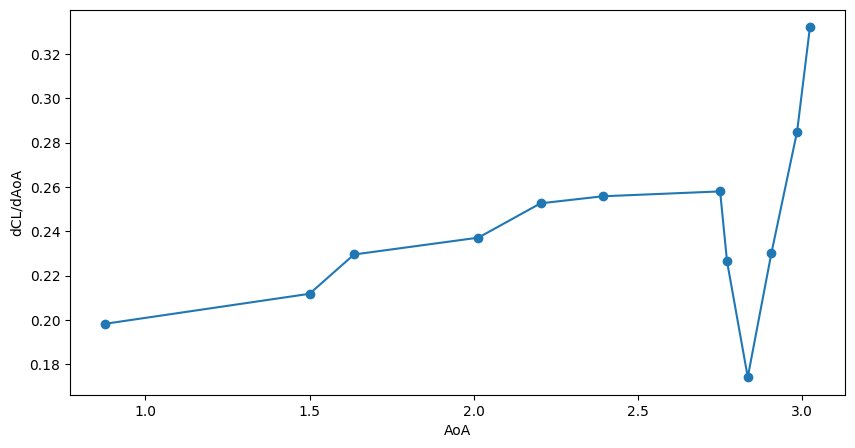

In [8]:
# dCL/dAoA-AoA
plt.figure(figsize=(10, 5))
plt.plot(df_converge["AoA"], df_converge["CL"].diff() / df_converge["AoA"].diff(), "-o")
plt.xlabel("AoA")
plt.ylabel("dCL/dAoA")
plt.show()

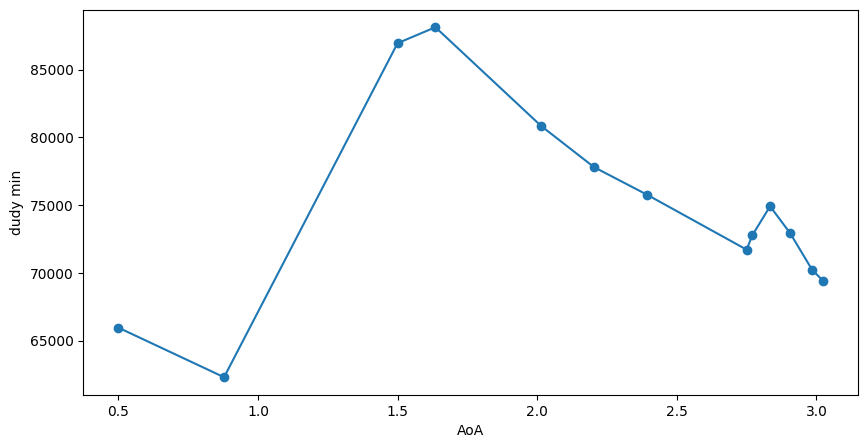

In [9]:
# dudy-AoA
plt.figure(figsize=(10, 5))
plt.plot(df_converge["AoA"], df_converge["dudy min"], "-o")
plt.xlabel("AoA")
plt.ylabel("dudy min")
plt.show()

In [10]:
df.to_csv("draft//20230706.csv")